# Google Drive

In [168]:
!pip install requests beautifulsoup4 pandas
!pip install pandas openpyxl
!pip install matplotlib networkx
import os
from google.colab import drive
drive.mount('/drive')


Mounted at /drive


# Import Data

In [257]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_nba_data(year):
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_games.html'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table', {'id': 'schedule'})
        headers = [th.getText() for th in table.find_all('tr')[0].find_all('th')]
        rows = table.find_all('tr')[1:]
        game_data = [[td.getText() for td in rows[i].find_all('td')] for i in range(len(rows))]
        games_df = pd.DataFrame(game_data, columns=headers[1:])  # skip the first column which is the rank
        return games_df
    else:
        print("Failed to retrieve data")
        return None

year = 2023  # Change to the year of interest
games_df = scrape_nba_data(year)
if not games_df.empty:
    games_df.to_csv('NBA_2024_games.csv', index=False)
    print("Data scraped and saved to CSV.")
else:
    print("No data to save.")


Data scraped and saved to CSV.


In [258]:

def convert_csv_to_xls(csv_file_path, xls_file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)

    # Write the DataFrame to an Excel file
    with pd.ExcelWriter(xls_file_path, engine='openpyxl') as writer:
        df.to_excel(writer, index=False)

    print(f"Converted {csv_file_path} to {xls_file_path}")

csv_file_path = "/content/NBA_2024_games.csv"
xls_file_path = "/content/NBA_2024_games.xls"
convert_csv_to_xls(csv_file_path, xls_file_path)

os.remove("NBA_2024_games.csv")


Converted /content/NBA_2024_games.csv to /content/NBA_2024_games.xls


# Data Manipulation


In [259]:
df = pd.read_excel("NBA_2024_games.xls")

In [260]:
df.drop(columns=df.columns[5], inplace=True)
df.drop(columns=['Attend.'], inplace=True)
df.drop(columns=['Notes'], inplace=True)
df.drop(columns=['Start (ET)'], inplace=True)

df.rename(columns={df.columns[4]: 'OT'}, inplace=True)


df.rename(columns={df.columns[0]: 'Visitor'}, inplace=True)
df.rename(columns={df.columns[2]: 'Home'}, inplace=True)
df.rename(columns={df.columns[1]: 'VPTS'}, inplace=True)
df.rename(columns={df.columns[3]: 'HPTS'}, inplace=True)

columns_titles = ["Home", "HPTS", "VPTS", "Visitor", "OT", "Arena"]
df=df.reindex(columns=columns_titles)


In [261]:
 df #df.loc[0][1] checks the value at row 0, column 1 like a double array

,Home,HPTS,VPTS,Visitor,OT,Arena
0,Boston Celtics,126,117,Philadelphia 76ers,NaN,TD Garden
1,Golden State Warriors,123,109,Los Angeles Lakers,NaN,Chase Center
2,Detroit Pistons,113,109,Orlando Magic,NaN,Little Caesars Arena
3,Indiana Pacers,107,114,Washington Wizards,NaN,Gainbridge Fieldhouse
4,Atlanta Hawks,117,107,Houston Rockets,NaN,State Farm Arena
...,...,...,...,...,...,...
97,Brooklyn Nets,116,109,Indiana Pacers,NaN,Barclays Center
98,Toronto Raptors,139,109,Atlanta Hawks,NaN,Scotiabank Arena
99,Milwaukee Bucks,110,108,Detroit Pistons,NaN,Fiserv Forum
100,Utah Jazz,121,105,Memphis Grizzlies,NaN,Vivint Arena


# Data Link


In [262]:
T_A = {
    "Atlanta Hawks": {"abbrev": "ATL", "arena": "State Farm Arena"},
    "Boston Celtics": {"abbrev": "BOS", "arena": "TD Garden"},
    "Brooklyn Nets": {"abbrev": "BKN", "arena": "Barclays Center"},
    "Charlotte Hornets": {"abbrev": "CHA", "arena": "Spectrum Center"},
    "Chicago Bulls": {"abbrev": "CHI", "arena": "United Center"},
    "Cleveland Cavaliers": {"abbrev": "CLE", "arena": "Rocket Mortgage FieldHouse"},
    "Dallas Mavericks": {"abbrev": "DAL", "arena": "American Airlines Center"},
    "Denver Nuggets": {"abbrev": "DEN", "arena": "Ball Arena"},
    "Detroit Pistons": {"abbrev": "DET", "arena": "Little Caesars Arena"},
    "Golden State Warriors": {"abbrev": "GSW", "arena": "Chase Center"},
    "Houston Rockets": {"abbrev": "HOU", "arena": "Toyota Center"},
    "Indiana Pacers": {"abbrev": "IND", "arena": "Gainbridge Fieldhouse"},
    "Memphis Grizzlies": {"abbrev": "MEM", "arena": "FedExForum"},
    "Miami Heat": {"abbrev": "MIA", "arena": "FTX Arena"},
    "Milwaukee Bucks": {"abbrev": "MIL", "arena": "Fiserv Forum"},
    "Minnesota Timberwolves": {"abbrev": "MIN", "arena": "Target Center"},
    "New Orleans Pelicans": {"abbrev": "NOP", "arena": "Smoothie King Center"},
    "New York Knicks": {"abbrev": "NYK", "arena": "Madison Square Garden"},
    "Oklahoma City Thunder": {"abbrev": "OKC", "arena": "Paycom Center"},
    "Orlando Magic": {"abbrev": "ORL", "arena": "Amway Center"},
    "Philadelphia 76ers": {"abbrev": "PHI", "arena": "Wells Fargo Center"},
    "Phoenix Suns": {"abbrev": "PHX", "arena": "Footprint Center"},
    "Portland Trail Blazers": {"abbrev": "POR", "arena": "Moda Center"},
    "Sacramento Kings": {"abbrev": "SAC", "arena": "Golden 1 Center"},
    "San Antonio Spurs": {"abbrev": "SAS", "arena": "AT&T Center"},
    "Toronto Raptors": {"abbrev": "TOR", "arena": "Scotiabank Arena"},
    "Utah Jazz": {"abbrev": "UTA", "arena": "Vivint Arena"},
    "Washington Wizards": {"abbrev": "WAS", "arena": "Capital One Arena"},
    "Los Angeles Clippers": {"abbrev": "LAC", "arena": "Crypto.com Arena"},
    "Los Angeles Lakers": {"abbrev": "LAL", "arena": "Crypto.com Arena"}
}

In [263]:
def compare_scores(row):
    if row['HPTS'] > row['VPTS']:
        return row['Home']
    elif row['HPTS'] < row['VPTS']:
        return row['Visitor']
    else:
        return 'Tie'


df['Winner'] = df.apply(compare_scores, axis=1)



In [269]:
# Create a dictionary to store the win counts
win_counts = {}

index=0


for index, row in df.iterrows():
    if row['HPTS'] > row['VPTS']:
        winner = row['Home']
        loser = row['Visitor']
    else:
        winner = row['Visitor']
        loser = row['Home']

    if winner not in win_counts:
      win_counts[winner] = {}

    if loser not in win_counts[winner]:
      win_counts[winner][loser] = 0

    win_counts[winner][loser] += 1


# THERE IS A COUNT VARIABLE FOR HOW MANY TEAMS WHICH TEAM BEAT WHICH TEAM YOU CAN USE IT LATER





*italicized text*# Graph

# Graph


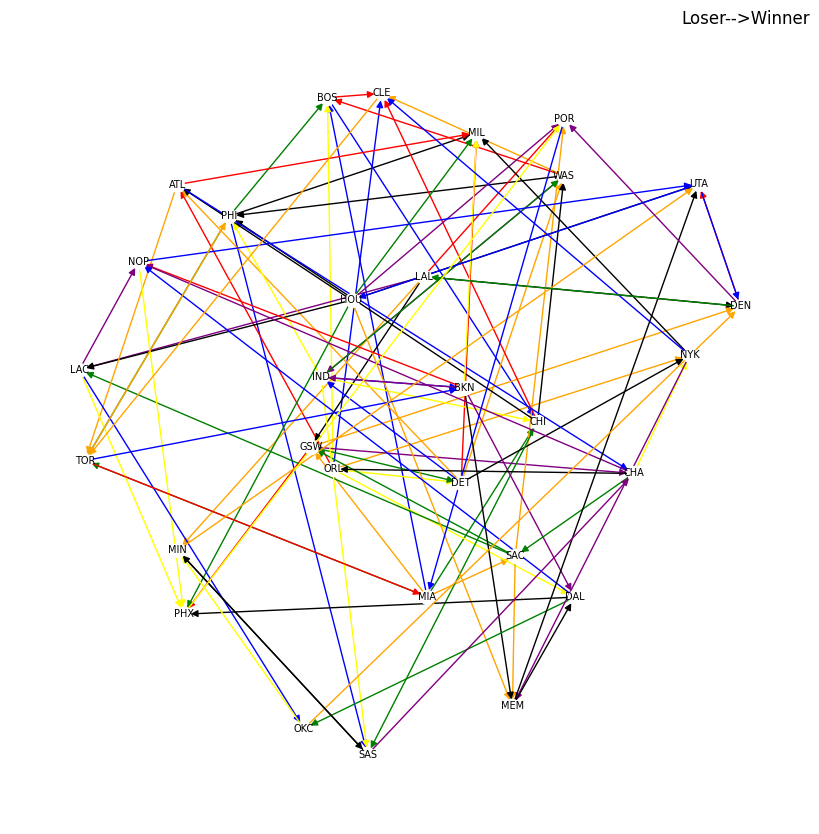

In [270]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import matplotlib.image as mpimg


G = nx.DiGraph()
edges = []



for winner, losers in win_counts.items():
    winner = T_A.get(winner, {}).get('abbrev', "unknown")
    for loser, count in losers.items():
      loser = T_A.get(loser, {}).get('abbrev', "unknown")
      edges.append((loser, winner))

G.add_edges_from(edges)

pos = nx.spring_layout(G, k=1.5, seed=69)

plt.figure(figsize=(8, 8))

edge_colors = [random.choice(['red', 'blue', 'green', 'yellow', 'purple', 'black', 'orange']) for _ in range(len(edges))]

nx.draw(G, pos, node_size=100, node_color='white', with_labels=True, arrows=True, edge_color=edge_colors, font_size=7)


plt.text(1, 1, 'Loser-->Winner', horizontalalignment='right', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.show()
